# 01 — Data Collection & Exploration

This notebook fetches S&P 500 stock data, fundamental data, and prepares price/returns matrices.

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data_loader import get_sp500_tickers, fetch_multiple_stocks, fetch_multiple_fundamentals, build_price_matrix, build_returns_matrix

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
%matplotlib inline

## 1. Fetch S&P 500 Constituents

In [2]:
sp500 = get_sp500_tickers()
print(f"Total S&P 500 stocks: {len(sp500)}")
sp500.head(10)

Total S&P 500 stocks: 503


,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
5,ADBE,Adobe Inc.,Information Technology,Application Software
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders
8,AFL,Aflac,Financials,Life & Health Insurance
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services


## 2. Select Stocks for Analysis

We select ~30 diverse stocks across sectors for a manageable analysis.

In [3]:
SELECTED_TICKERS = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "JPM", "V", "MA", "GS", "JNJ", "UNH", "LLY", "MRK", "ABBV", "XOM", "CVX", "PG", "KO", "PEP", "WMT", "HD", "CRM", "AMD", "NFLX", "DIS", "INTC", "BA", "GE"]
print(f"Selected {len(SELECTED_TICKERS)} stocks for analysis")
print(f"Tickers: {SELECTED_TICKERS}")

Selected 30 stocks for analysis
Tickers: ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'JPM', 'V', 'MA', 'GS', 'JNJ', 'UNH', 'LLY', 'MRK', 'ABBV', 'XOM', 'CVX', 'PG', 'KO', 'PEP', 'WMT', 'HD', 'CRM', 'AMD', 'NFLX', 'DIS', 'INTC', 'BA', 'GE']


## 3. Download Historical Price Data

In [4]:
stock_data = fetch_multiple_stocks(SELECTED_TICKERS, period="2y")
print(f"\nLoaded {len(stock_data)} stocks")
print(f"Date range: {list(stock_data.values())[0].index[0]} to {list(stock_data.values())[0].index[-1]}")
print(f"Sample data shape: {list(stock_data.values())[0].shape}")
list(stock_data.values())[0].head()

Fetching stock data:   0%|          | 0/30 [00:00<?, ?it/s]

Fetching stock data:   3%|▎         | 1/30 [00:00<00:21,  1.34it/s]

Fetching stock data:   7%|▋         | 2/30 [00:00<00:12,  2.22it/s]

Fetching stock data:  10%|█         | 3/30 [00:01<00:08,  3.06it/s]

Fetching stock data:  13%|█▎        | 4/30 [00:01<00:06,  3.80it/s]

Fetching stock data:  17%|█▋        | 5/30 [00:01<00:06,  4.15it/s]

Fetching stock data:  20%|██        | 6/30 [00:01<00:05,  4.05it/s]

Fetching stock data:  23%|██▎       | 7/30 [00:01<00:04,  4.91it/s]

Fetching stock data:  27%|██▋       | 8/30 [00:02<00:05,  3.98it/s]

Fetching stock data:  30%|███       | 9/30 [00:02<00:04,  4.48it/s]

Fetching stock data:  33%|███▎      | 10/30 [00:02<00:04,  4.30it/s]

Fetching stock data:  37%|███▋      | 11/30 [00:02<00:04,  4.52it/s]

Fetching stock data:  40%|████      | 12/30 [00:03<00:04,  3.90it/s]

Fetching stock data:  43%|████▎     | 13/30 [00:03<00:04,  4.04it/s]

Fetching stock data:  47%|████▋     | 14/30 [00:03<00:04,  3.86it/s]

Fetching stock data:  50%|█████     | 15/30 [00:04<00:04,  3.58it/s]

Fetching stock data:  53%|█████▎    | 16/30 [00:04<00:03,  3.90it/s]

Fetching stock data:  57%|█████▋    | 17/30 [00:04<00:03,  3.75it/s]

Fetching stock data:  60%|██████    | 18/30 [00:04<00:03,  3.17it/s]

Fetching stock data:  63%|██████▎   | 19/30 [00:05<00:03,  2.99it/s]

Fetching stock data:  67%|██████▋   | 20/30 [00:05<00:03,  2.99it/s]

Fetching stock data:  70%|███████   | 21/30 [00:06<00:03,  2.97it/s]

Fetching stock data:  73%|███████▎  | 22/30 [00:06<00:02,  2.98it/s]

Fetching stock data:  77%|███████▋  | 23/30 [00:06<00:02,  3.12it/s]

Fetching stock data:  80%|████████  | 24/30 [00:06<00:01,  3.41it/s]

Fetching stock data:  83%|████████▎ | 25/30 [00:07<00:01,  3.93it/s]

Fetching stock data:  87%|████████▋ | 26/30 [00:07<00:00,  4.70it/s]

Fetching stock data:  90%|█████████ | 27/30 [00:07<00:00,  4.31it/s]

Fetching stock data:  93%|█████████▎| 28/30 [00:07<00:00,  4.00it/s]

Fetching stock data:  97%|█████████▋| 29/30 [00:08<00:00,  3.63it/s]

Fetching stock data: 100%|██████████| 30/30 [00:08<00:00,  3.24it/s]

Fetching stock data: 100%|██████████| 30/30 [00:08<00:00,  3.55it/s]

Successfully loaded data for 30/30 tickers

Loaded 30 stocks
Date range: 2024-02-26 00:00:00-05:00 to 2026-02-25 00:00:00-05:00
Sample data shape: (502, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2024-02-26 00:00:00-05:00,180.596446,181.111745,179.020774,179.526184,40867400
2024-02-27 00:00:00-05:00,179.466725,182.261285,177.940605,180.982925,54318900
2024-02-28 00:00:00-05:00,180.863964,181.468463,178.505439,179.783798,48953900
2024-02-29 00:00:00-05:00,179.635172,180.923451,177.910859,179.119858,136682600
2024-03-01 00:00:00-05:00,177.930680,178.901837,175.780252,178.039688,73563100


## 4. Download Fundamental Data

In [5]:
fundamentals_df = fetch_multiple_fundamentals(SELECTED_TICKERS)
print(f"Fundamentals shape: {fundamentals_df.shape}")
fundamentals_df.head(10)

Fetching fundamentals:   0%|          | 0/30 [00:00<?, ?it/s]

Fetching fundamentals:   3%|▎         | 1/30 [00:00<00:06,  4.32it/s]

Fetching fundamentals:   7%|▋         | 2/30 [00:00<00:07,  3.91it/s]

Fetching fundamentals:  10%|█         | 3/30 [00:00<00:06,  4.20it/s]

Fetching fundamentals:  13%|█▎        | 4/30 [00:01<00:06,  3.77it/s]

Fetching fundamentals:  17%|█▋        | 5/30 [00:01<00:06,  3.95it/s]

Fetching fundamentals:  20%|██        | 6/30 [00:01<00:05,  4.40it/s]

Fetching fundamentals:  23%|██▎       | 7/30 [00:01<00:05,  4.30it/s]

Fetching fundamentals:  27%|██▋       | 8/30 [00:01<00:04,  4.62it/s]

Fetching fundamentals:  30%|███       | 9/30 [00:02<00:05,  3.75it/s]

Fetching fundamentals:  33%|███▎      | 10/30 [00:02<00:04,  4.10it/s]

Fetching fundamentals:  37%|███▋      | 11/30 [00:02<00:04,  3.88it/s]

Fetching fundamentals:  40%|████      | 12/30 [00:02<00:04,  4.21it/s]

Fetching fundamentals:  43%|████▎     | 13/30 [00:03<00:04,  4.00it/s]

Fetching fundamentals:  47%|████▋     | 14/30 [00:03<00:03,  4.06it/s]

Fetching fundamentals:  50%|█████     | 15/30 [00:03<00:03,  3.94it/s]

Fetching fundamentals:  53%|█████▎    | 16/30 [00:03<00:03,  3.76it/s]

Fetching fundamentals:  57%|█████▋    | 17/30 [00:04<00:03,  3.81it/s]

Fetching fundamentals:  60%|██████    | 18/30 [00:04<00:03,  3.94it/s]

Fetching fundamentals:  63%|██████▎   | 19/30 [00:04<00:02,  3.85it/s]

Fetching fundamentals:  67%|██████▋   | 20/30 [00:04<00:02,  3.99it/s]

Fetching fundamentals:  70%|███████   | 21/30 [00:05<00:02,  3.63it/s]

Fetching fundamentals:  73%|███████▎  | 22/30 [00:05<00:02,  3.82it/s]

Fetching fundamentals:  77%|███████▋  | 23/30 [00:05<00:01,  3.70it/s]

Fetching fundamentals:  80%|████████  | 24/30 [00:06<00:01,  4.00it/s]

Fetching fundamentals:  83%|████████▎ | 25/30 [00:06<00:01,  3.80it/s]

Fetching fundamentals:  87%|████████▋ | 26/30 [00:06<00:01,  3.96it/s]

Fetching fundamentals:  90%|█████████ | 27/30 [00:06<00:00,  3.78it/s]

Fetching fundamentals:  93%|█████████▎| 28/30 [00:07<00:00,  4.12it/s]

Fetching fundamentals:  97%|█████████▋| 29/30 [00:07<00:00,  3.98it/s]

Fetching fundamentals: 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]

Fetching fundamentals: 100%|██████████| 30/30 [00:07<00:00,  3.98it/s]

Fundamentals shape: (30, 14)


,name,sector,industry,market_cap,pe_ratio,forward_pe,beta,dividend_yield,52_week_high,52_week_low,avg_volume,profit_margin,revenue_growth,earnings_growth
ticker,,,,,,,,,,,,,,
AAPL,Apple Inc.,Technology,Consumer Electronics,4019882557440,34.664130,29.411228,1.107,0.38,288.62,169.21,48279330,0.27037,0.157,0.183
MSFT,Microsoft Corporation,Technology,Software - Infrastructure,2973498343424,25.020239,21.224525,1.084,0.94,555.45,344.79,31280636,0.39044,0.167,0.598
GOOGL,Alphabet Inc.,Communication Services,Internet Content & Information,3752512454656,28.669308,23.128235,1.086,0.27,349.00,140.53,36532068,0.32810,0.180,0.311
AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,2260967358464,29.374895,22.661888,1.385,NaN,258.60,161.38,46740750,0.10834,0.136,0.050
NVDA,NVIDIA Corporation,Technology,Semiconductors,4763977515008,48.553350,24.901943,2.314,0.02,212.19,86.62,171328373,0.53007,0.625,0.667
META,"Meta Platforms, Inc.",Communication Services,Internet Content & Information,1639927250944,27.634550,18.108616,1.284,0.33,796.25,479.80,16227781,0.30084,0.238,0.107
TSLA,"Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,1558741385216,391.882080,148.126820,1.887,NaN,498.83,214.25,66820915,0.04001,-0.031,-0.606
JPM,JPMorgan Chase & Co.,Financial Services,Banks - Diversified,813532905472,15.074463,12.839942,1.053,2.02,337.25,202.16,10499628,0.33910,0.025,-0.036
V,Visa Inc.,Financial Services,Credit Services,603428159488,29.359756,21.536375,0.780,0.87,375.51,299.00,7475176,0.50233,0.146,0.174


## 5. Build Price & Returns Matrices

In [6]:
price_matrix = build_price_matrix(stock_data)
returns_matrix = build_returns_matrix(stock_data)
print(f"Price matrix: {price_matrix.shape}")
print(f"Returns matrix: {returns_matrix.shape}")
price_matrix.head()

Price matrix: (502, 30)
Returns matrix: (501, 30)


,AAPL,MSFT,GOOGL,AMZN,NVDA,META,TSLA,JPM,V,MA,GS,JNJ,UNH,LLY,MRK,ABBV,XOM,CVX,PG,KO,PEP,WMT,HD,CRM,AMD,NFLX,DIS,INTC,BA,GE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-02-26 00:00:00-05:00,179.526184,401.379303,136.538345,174.729996,79.047966,478.905823,199.399994,175.660217,279.950623,469.120453,373.371033,152.374832,504.790619,761.300293,120.872673,166.925583,97.496147,141.669205,152.185593,57.222519,156.774078,58.335693,353.892792,296.783966,176.009995,58.764999,105.545418,42.546196,200.539993,122.014610
2024-02-27 00:00:00-05:00,180.982925,401.320312,137.838547,173.539993,78.657181,484.184601,199.729996,175.746414,278.985107,469.357758,373.935547,152.554886,493.355621,754.475586,121.050926,167.093643,97.290390,139.568726,151.311722,56.873768,156.680908,58.325905,357.664062,295.904694,178.000000,60.167000,107.250916,42.288879,201.399994,121.399696
2024-02-28 00:00:00-05:00,179.783798,401.556671,135.357285,173.160004,77.619759,481.172424,202.039993,176.637405,281.408661,473.411255,378.869202,153.095032,478.807343,747.216919,120.262878,166.169418,97.561615,139.733826,152.024124,56.930332,155.628052,58.355270,359.616364,296.171417,176.539993,59.647999,108.603561,41.556522,207.000000,122.676834
2024-02-29 00:00:00-05:00,179.119858,407.387177,137.421677,176.759995,79.067947,487.246490,201.880005,178.246826,278.462891,469.367645,374.889496,152.933945,474.310242,743.311279,119.287186,164.349030,97.748665,139.431122,150.969772,56.572151,155.229019,57.366699,362.473389,305.112793,192.529999,60.292000,109.368095,42.605576,203.720001,123.685951
2024-03-01 00:00:00-05:00,178.039688,409.219055,136.111572,178.220001,82.233177,499.344849,202.639999,177.509155,278.975250,471.216461,373.974091,153.635208,470.399231,771.359985,119.108932,167.018951,98.983139,140.164917,150.884308,56.110298,154.524902,57.513515,366.130493,313.076080,202.639999,61.933998,109.730766,43.367626,200.000000,125.073463


## 6. Initial Data Exploration

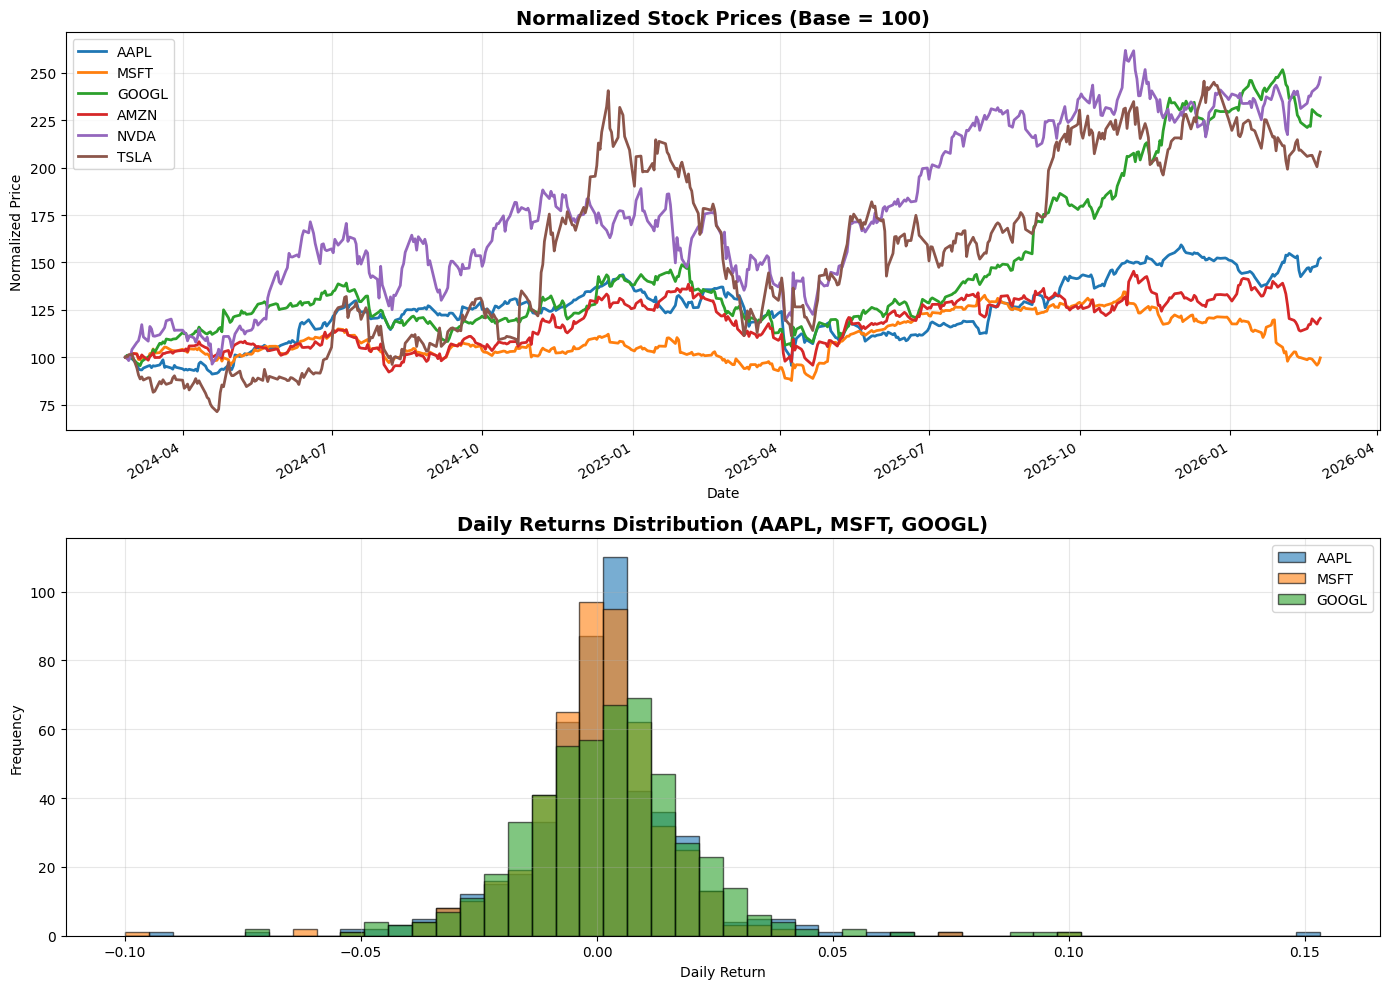

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Normalize prices to base 100
sample_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA']
normalized_prices = price_matrix[sample_tickers].div(price_matrix[sample_tickers].iloc[0]) * 100
normalized_prices.plot(ax=axes[0], linewidth=2)
axes[0].set_title('Normalized Stock Prices (Base = 100)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Normalized Price')
axes[0].legend(loc='best')
axes[0].grid(alpha=0.3)

# Plot returns distribution for 3 stocks
returns_matrix[['AAPL', 'MSFT', 'GOOGL']].plot(kind='hist', bins=50, ax=axes[1], alpha=0.6, edgecolor='black')
axes[1].set_title('Daily Returns Distribution (AAPL, MSFT, GOOGL)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Daily Return')
axes[1].set_ylabel('Frequency')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("../figures/01_price_overview.png", dpi=150, bbox_inches="tight")
plt.show()

## 7. Save Data

In [8]:
os.makedirs("../data/raw", exist_ok=True)
price_matrix.to_parquet("../data/raw/price_matrix.parquet")
returns_matrix.to_parquet("../data/raw/returns_matrix.parquet")
fundamentals_df.to_parquet("../data/raw/fundamentals.parquet")
print("Saved: price_matrix, returns_matrix, fundamentals to data/raw/")

Saved: price_matrix, returns_matrix, fundamentals to data/raw/
